In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
import torchvision
from torchvision import datasets
from torchvision import transforms

In [ ]:
transforms = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(degrees=(-25, 25)),
    transforms.ToTensor(),
    transforms.Normalize((0.5), (0.5))
])

In [ ]:
train_dataset = torchvision.datasets.FashionMNIST(root="./data", train=True, transform=transforms, download=True)
val_dataset = torchvision.datasets.FashionMNIST(root="./data", train=False, transform=transforms, download=True)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



In [ ]:
train_loader = torch.utils.data.DataLoader(train_dataset,
                                           batch_size=64,
                                           shuffle=True)

val_loader = torch.utils.data.DataLoader(val_dataset,
                                          batch_size=64,
                                          shuffle=True)

In [ ]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(32 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = nn.functional.relu(x)
        x = self.pool(x)
        x = self.conv2(x)
        x = nn.functional.relu(x)
        x = self.pool(x)
        x = x.view(-1, 32 * 7 * 7)
        x = self.fc1(x)
        x = nn.functional.relu(x)
        x = self.fc2(x)
        return x

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else ("cpu"))

model = CNN().to(device=device)

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters())

In [ ]:

# Train the model and track loss and accuracy
train_loss = []
train_acc = []
valid_loss = []
valid_acc = []
num_epochs = 20

for epoch in range(num_epochs):
    # Train the model
    model.train()
    correct = 0
    total = 0
    for i, (inputs, labels) in enumerate(train_loader):
        inputs = inputs.to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(inputs)

        # Compute loss
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Save training loss
        train_loss.append(loss.item())

        # Calculate training accuracy
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    train_acc.append(100 * correct / total)

    # Evaluate the model on validation set
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs = inputs.to(device)
            labels = labels.to(device)

            # Forward pass
            outputs = model(inputs)

            # Compute loss
            loss = criterion(outputs, labels)

            # Save validation loss
            valid_loss.append(loss.item())

            # Calculate validation accuracy
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    valid_acc.append(100 * correct / total)

    # Print epoch and losses
    print('Epoch [{}/{}], Training Loss: {:.4f}, Training Acc: {:.4f}        Val Loss: {:.4f}, Validation Acc: {:.4f}'
          .format(epoch+1, num_epochs, train_loss[-1], train_acc[-1], valid_loss[-1], valid_acc[-1]))

# Plot the loss and accuracy over epochs

plt.plot(train_acc, label='Training Accuracy')
plt.plot(valid_acc, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


Epoch [1/50], Training Loss: 0.0995, Training Acc: 91.9300        Val Loss: 0.8101, Validation Acc: 90.4900
Epoch [2/50], Training Loss: 0.2037, Training Acc: 92.0467        Val Loss: 0.0982, Validation Acc: 90.6000
Epoch [3/50], Training Loss: 0.0840, Training Acc: 92.0533        Val Loss: 0.1100, Validation Acc: 90.4300
Epoch [4/50], Training Loss: 0.1451, Training Acc: 92.2533        Val Loss: 0.3002, Validation Acc: 90.4300
Epoch [5/50], Training Loss: 0.2148, Training Acc: 92.1917        Val Loss: 0.1483, Validation Acc: 90.5300
Epoch [6/50], Training Loss: 0.1040, Training Acc: 92.2783        Val Loss: 0.3410, Validation Acc: 90.8200
Epoch [7/50], Training Loss: 0.1567, Training Acc: 92.3200        Val Loss: 0.2040, Validation Acc: 90.8000
Epoch [8/50], Training Loss: 0.1467, Training Acc: 92.4117        Val Loss: 0.1783, Validation Acc: 90.7900
Epoch [9/50], Training Loss: 0.1254, Training Acc: 92.5433        Val Loss: 0.0510, Validation Acc: 90.9700
Epoch [10/50], Training Loss

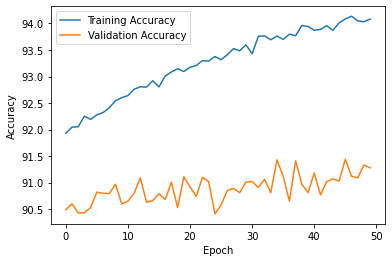

In [ ]:

# Train the model and track loss and accuracy
train_loss = []
train_acc = []
valid_loss = []
valid_acc = []
num_epochs = 50

for epoch in range(num_epochs):
    # Train the model
    model.train()
    correct = 0
    total = 0
    for i, (inputs, labels) in enumerate(train_loader):
        inputs = inputs.to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(inputs)

        # Compute loss
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Save training loss
        train_loss.append(loss.item())

        # Calculate training accuracy
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    train_acc.append(100 * correct / total)

    # Evaluate the model on validation set
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs = inputs.to(device)
            labels = labels.to(device)

            # Forward pass
            outputs = model(inputs)

            # Compute loss
            loss = criterion(outputs, labels)

            # Save validation loss
            valid_loss.append(loss.item())

            # Calculate validation accuracy
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    valid_acc.append(100 * correct / total)

    # Print epoch and losses
    print('Epoch [{}/{}], Training Loss: {:.4f}, Training Acc: {:.4f}        Val Loss: {:.4f}, Validation Acc: {:.4f}'
          .format(epoch+1, num_epochs, train_loss[-1], train_acc[-1], valid_loss[-1], valid_acc[-1]))

# Plot the loss and accuracy over epochs

plt.plot(train_acc, label='Training Accuracy')
plt.plot(valid_acc, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


Epoch [1/100], Training Loss: 0.0669, Training Acc: 94.1717        Val Loss: 0.1397, Validation Acc: 91.0900
Epoch [2/100], Training Loss: 0.0453, Training Acc: 94.1817        Val Loss: 0.0149, Validation Acc: 91.1900
Epoch [3/100], Training Loss: 0.0879, Training Acc: 94.0717        Val Loss: 0.0871, Validation Acc: 90.7300
Epoch [4/100], Training Loss: 0.0738, Training Acc: 94.1233        Val Loss: 0.5573, Validation Acc: 91.2600
Epoch [5/100], Training Loss: 0.2539, Training Acc: 94.2083        Val Loss: 0.0239, Validation Acc: 90.7900
Epoch [6/100], Training Loss: 0.0817, Training Acc: 94.2817        Val Loss: 0.2051, Validation Acc: 91.1000
Epoch [7/100], Training Loss: 0.1224, Training Acc: 94.2150        Val Loss: 0.6870, Validation Acc: 91.0200
Epoch [8/100], Training Loss: 0.1084, Training Acc: 94.1767        Val Loss: 0.2534, Validation Acc: 91.2100
Epoch [9/100], Training Loss: 0.0587, Training Acc: 94.1983        Val Loss: 0.4273, Validation Acc: 90.8100
Epoch [10/100], Tra

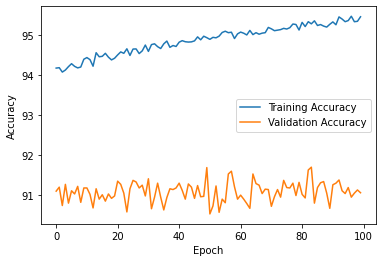

In [ ]:

# Train the model and track loss and accuracy
train_loss = []
train_acc = []
valid_loss = []
valid_acc = []
num_epochs = 100

for epoch in range(num_epochs):
    # Train the model
    model.train()
    correct = 0
    total = 0
    for i, (inputs, labels) in enumerate(train_loader):
        inputs = inputs.to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(inputs)

        # Compute loss
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Save training loss
        train_loss.append(loss.item())

        # Calculate training accuracy
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    train_acc.append(100 * correct / total)

    # Evaluate the model on validation set
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs = inputs.to(device)
            labels = labels.to(device)

            # Forward pass
            outputs = model(inputs)

            # Compute loss
            loss = criterion(outputs, labels)

            # Save validation loss
            valid_loss.append(loss.item())

            # Calculate validation accuracy
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    valid_acc.append(100 * correct / total)

    # Print epoch and losses
    print('Epoch [{}/{}], Training Loss: {:.4f}, Training Acc: {:.4f}        Val Loss: {:.4f}, Validation Acc: {:.4f}'
          .format(epoch+1, num_epochs, train_loss[-1], train_acc[-1], valid_loss[-1], valid_acc[-1]))

# Plot the loss and accuracy over epochs

plt.plot(train_acc, label='Training Accuracy')
plt.plot(valid_acc, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
